# Modelling and Forecasting Exchange Rate Task 2
 Group Moneypredictors
 
 Country South Korea

# Data Loading and Visualization

Data set link: https://drive.google.com/file/d/17rDi8HzcaV1hOElrwiD3CpUSc7TEKpth/view?usp=sharing

In [ ]:
import matplotlib.pyplot as plt             ###Installing the required libraries
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Data_ER.csv')  ###Reading the dataset
print(data.shape)
data

(168, 6)


,Years,SKW_USD_FX,INF_Diff,M_Diff,GDP_diff,CA_diff
0,1980.1,571.0643,12.603550,-11.906443,-4.086520,1366.8
1,1980.2,594.0667,12.260130,-12.076011,-3.142056,-601.7
2,1980.3,613.3334,15.938360,-12.422379,2.312286,-6018.2
3,1980.4,651.3200,19.347220,-12.664726,-0.547334,-3958.5
4,1981.1,667.1733,13.821340,-12.844519,0.995386,-2618.7
...,...,...,...,...,...,...
163,2020.4,1118.6680,-0.785339,-8.545700,1.373803,223138.2
164,2021.1,1113.7670,-0.476082,-11.161400,1.639346,217113.8
165,2021.2,1121.4050,-2.361083,-12.291200,-5.972542,229148.8
166,2021.3,1159.2770,-2.800425,-13.412200,-0.908437,245831.9


Our dependent variable 'y' is SKW_USD_FX

While independent variables 'x' are INF_Diff, M_Diff, GDP_diff and CA_diff

In [ ]:
data[['SKW_USD_FX', 'INF_Diff','M_Diff', 'GDP_diff', 'CA_diff']].describe(include='all')

,SKW_USD_FX,INF_Diff,M_Diff,GDP_diff,CA_diff
count,168.000000,168.000000,168.000000,168.000000,168.000000
mean,984.791723,1.382012,-9.925313,3.345091,84910.102976
std,209.216917,3.337251,7.834529,4.058628,65669.782109
min,571.064300,-3.142865,-21.135181,-11.359602,-12721.500000
25%,794.531350,-0.451415,-16.107640,0.991075,24660.125000
50%,1027.792500,0.555895,-10.151600,2.912113,96859.500000
75%,1157.422000,1.922643,-4.263693,5.719765,125248.025000
max,1604.572000,19.347220,10.948800,12.669971,245831.900000


# Graphs

Text(0.5, 1.0, 'SKW/USD_FX v/s Years')

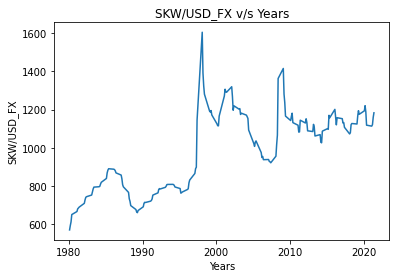

In [ ]:
x=data.Years
y=data.SKW_USD_FX
plt.plot(x,y)
plt.xlabel("Years")
plt.ylabel("SKW/USD_FX")
plt.title('SKW/USD_FX v/s Years')

Text(0.5, 1.0, 'INF_Diff v/s Years')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


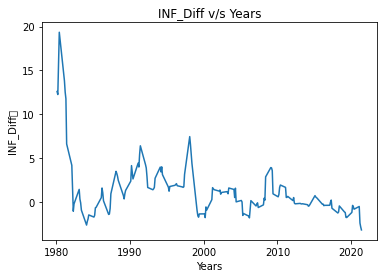

In [ ]:
x=data.Years
y=data.INF_Diff	
plt.plot(x,y)
plt.xlabel("Years")
plt.ylabel("INF_Diff	")
plt.title('INF_Diff v/s Years')

Text(0.5, 1.0, 'M_Diff v/s Years')

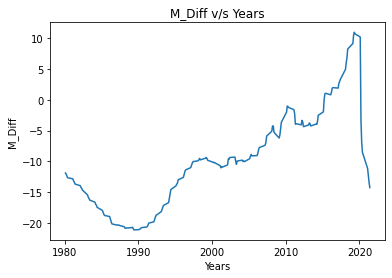

In [ ]:
x=data.Years
y=data.M_Diff	
plt.plot(x,y)
plt.xlabel("Years")
plt.ylabel("M_Diff")
plt.title('M_Diff v/s Years')

Text(0.5, 1.0, 'GDP_diff v/s Years')

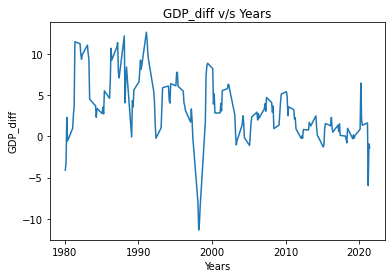

In [ ]:
x=data.Years
y=data.GDP_diff
plt.plot(x,y)
plt.xlabel("Years")
plt.ylabel("GDP_diff")
plt.title('GDP_diff v/s Years')

Text(0.5, 1.0, 'CA_diff v/s Years')

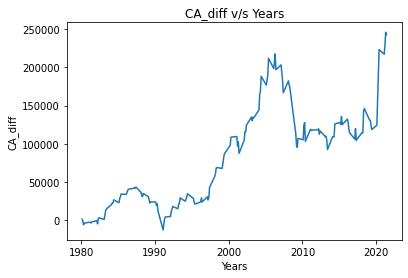

In [ ]:
x=data.Years
y=data.CA_diff
plt.plot(x,y)
plt.xlabel("Years")
plt.ylabel("CA_diff")
plt.title('CA_diff v/s Years')

# Correlation Matrix and its Results

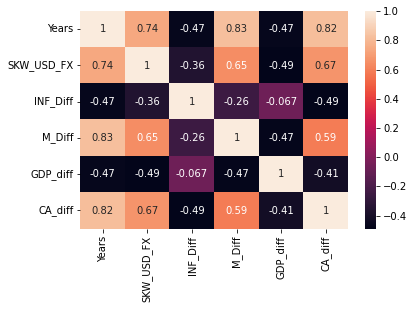

In [ ]:
# Drawing a correlation matrix
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True)

Strong Correlation is found between SKW_USD_FX and:

1) M_Diff (0.65)

2) CA_Diff (0.67)

Weak Correlation is found between SKW_USD_FX and:

1) INF_Diff (-0.36)

2) GDP_Diff (-0.49)

#Checking for Multicollinearity

VIF is used to identify the correlation of one independent variable with a group of other variables.

VIF = 1 → No correlation

VIF = 1 to 5 → Moderate correlation

VIF >10 → High correlation

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
df1 = data.iloc[:,:]
vif_scores(df1)

,Independent Features,VIF Scores
0,Years,70.354832
1,SKW_USD_FX,55.840451
2,INF_Diff,1.788673
3,M_Diff,5.009088
4,GDP_diff,2.712373
5,CA_diff,6.405381


From our 4 independent variables, none of them have high coorelation (VIF above 10) so we don't have to worry about multicollinearity

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
df_ols = data        ### This is not needed here, used later
df=data.drop("Years",axis=1)
df1=df.drop("SKW_USD_FX",axis=1)
X = df1
y=data.SKW_USD_FX
print(X.shape)
print(y.shape)

(168, 4)
(168,)


In [ ]:
df1.head()

,INF_Diff,M_Diff,GDP_diff,CA_diff
0,12.60355,-11.906443,-4.086520,1366.8
1,12.26013,-12.076011,-3.142056,-601.7
2,15.93836,-12.422379,2.312286,-6018.2
3,19.34722,-12.664726,-0.547334,-3958.5
4,13.82134,-12.844519,0.995386,-2618.7


In [ ]:
#use linear regression class and create the model
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
model.coef_

array([-7.86383204e+00,  8.60819607e+00, -1.05964578e+01,  1.06946778e-03])

In [ ]:
model.intercept_

1025.7361675554941

SKW_USD_FX = (-7.86383204e+00)INF_Diff + (8.60819607e+00)M_Diff + (-1.05964578e+01)GDP_diff + (1.06946778e-03)CA_diff + 1025.7361675554941

# Evaluation

In [ ]:
y_predicted=model.predict(X)
#y_predicted

In [ ]:
model.score(X,y)

0.5804924468860142

In [ ]:
#from sklearn.metrics import r2_score         ##Not needed
#score=r2_score(y,y_predicted)
#score

It is the R squared metric score

# OLS (Ordinary Least Squares)

In [ ]:
import statsmodels.api as sm # import statsmodels 
A=df_ols[['INF_Diff','M_Diff', 'GDP_diff', 'CA_diff']] ## input variables (or independent variables)
B=df_ols[['SKW_USD_FX']] ## output/dependent variable
A1 = sm.add_constant(A) ## Adding intercept (beta_0) to the model
model_ols = sm.OLS(B,A1).fit() ## sm.OLS(output, input)
# Print out the statistics

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SKW_USD_FX   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     56.39
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           8.66e-30
Time:                        10:15:42   Log-Likelihood:                -1062.6
No. Observations:                 168   AIC:                             2135.
Df Residuals:                     163   BIC:                             2151.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1025.7362     37.368     27.450      0.000     951.949    1099.524
INF_Diff      -7.8638      3.886     -2.024      0.045     -15.537      -0.190
M_Diff         8.6082      1.769      4.866      0.000       5.115      12.102
GDP_diff     -10.5965      3.216     -3.295      0.001     -16.947      -4.246
CA_diff        0.0011      0.000      4.548      0.000       0.001       0.002
==============================================================================
Omnibus:                       33.173   Durbin-Watson:                   0.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.081
Skew:                           1.044   Prob(JB):                     8.09e-12
Kurtosis:                       4.713   Cond. No.                     3.79e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#sm.OLS(B,A1).predict(y_predicted, X)

In [ ]:
df_ols=data.drop("Years",axis=1)
df_ols=df_ols.drop("SKW_USD_FX",axis=1)
df_ols=df_ols.drop("CA_diff",axis=1)
X = df_ols
y=data.SKW_USD_FX
print(X.shape)
print(y.shape)

(168, 3)
(168,)


In [ ]:
df_ols.head()

,INF_Diff,M_Diff,GDP_diff
0,12.60355,-11.906443,-4.086520
1,12.26013,-12.076011,-3.142056
2,15.93836,-12.422379,2.312286
3,19.34722,-12.664726,-0.547334
4,13.82134,-12.844519,0.995386


In [ ]:
#use linear regression class and create the model
model=LinearRegression()
model.fit(X,y)
y_predicted=model.predict(X)
model.score(X,y)

0.527249941813219

In [ ]:
y_predicted=model.predict(X)
model.score(X,y)

0.527249941813219

In [ ]:
import statsmodels.api as sm # import statsmodels 
A=data[['INF_Diff','M_Diff', 'GDP_diff']] ## input variables (or independent variables)
B=data[['SKW_USD_FX']] ## output/dependent variable
A1 = sm.add_constant(A) ## Adding intercept (beta_0) to the model
model_ols = sm.OLS(B,A1).fit() ## sm.OLS(output, input)
# Print out the statistics

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SKW_USD_FX   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     60.97
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           1.56e-26
Time:                        10:33:44   Log-Likelihood:                -1072.6
No. Observations:                 168   AIC:                             2153.
Df Residuals:                     164   BIC:                             2166.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1176.1387     18.419     63.855      0.000    1139.770    1212.508
INF_Diff     -16.6482      3.569     -4.665      0.000     -23.695      -9.601
M_Diff        11.7842      1.720      6.850      0.000       8.387      15.181
GDP_diff     -15.3590      3.218     -4.773      0.000     -21.713      -9.005
==============================================================================
Omnibus:                       25.990   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.040
Skew:                           0.971   Prob(JB):                     6.69e-08
Kurtosis:                       3.974   Cond. No.                         22.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""